BASADO EN LOS NOTEBOOKS E INFORMACION DE:\
\
GABRIELA PARI\
MATIAS BARRETO\
THE AI GUY (YOUTUBE)


# Instalacion de Librerias necesarias

Antes de empezar, instalamos las librerías principales que vamos a usar.

- NumPy (versión 1.23.5): para trabajar con arreglos y operaciones matemáticas de manera eficiente.

- OpenCV: para procesamiento de imágenes y video, como lectura, escritura, detección de objetos, etc.

- MediaPipe: para detectar y seguir elementos como rostros, manos y poses humanas en imágenes o video.

- Ultralytics: para usar los modelos de detección de objetos de la familia YOLO (You Only Look Once), que nos permiten detectar objetos en tiempo real.

Nota: El parámetro --quiet es para que la instalación muestre menos mensajes en pantalla.



En este bloque instalo la librería NumPy en su versión 1.23.5, utilizada para el manejo eficiente de arreglos y matrices numéricas en Python. Se especifica la versión para evitar problemas de compatibilidad con otras librerías.

También se instala las librerías OpenCV (procesamiento de imágenes y video), MediaPipe (detección y seguimiento de elementos como rostros, manos o poses humanas) y Ultralytics (implementación de modelos de detección de objetos como YOLO). Todas estas herramientas se usan comúnmente en aplicaciones de visión por computadora e inteligencia artificial.

In [49]:
### PACIENCIA, TARDA 3 MINUTOS MASO

# Instalamos las librerías necesarias para la clase

# Instalamos NumPy en la versión 1.23.5 para trabajar con matrices numéricas
!pip install numpy==1.23.5 --quiet

# Instalamos OpenCV (imágenes), MediaPipe (detección de rostros y poses) y Ultralytics (modelos YOLO)
!pip install opencv-python mediapipe ultralytics --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2

## >>>>>> OJO: REINICIAR SESION ANTES DE SEGUIR!!!

#Importamos las librerías



Ahora cargamos en nuestro entorno las librerías necesarias para trabajar:

cv2: módulo de OpenCV para procesar imágenes.

mediapipe: para utilizar sus modelos de reconocimiento de poses y rostros.

numpy: para trabajar con arreglos numéricos.

PIL, io, html, time: utilidades varias para manipular imágenes y datos.

Herramientas de Jupyter/Colab (display, Javascript, Image, eval_js): para mostrar imágenes y ejecutar código Javascript desde Python.

In [1]:
# Importamos las librerías principales que vamos a utilizar
import cv2  # OpenCV: procesamiento de imágenes y video
import mediapipe as mp  # MediaPipe: modelos de IA para detectar rostros, manos, poses
import numpy as np  # NumPy: manejo eficiente de matrices y operaciones matemáticas
import pandas as pd

# Importamos herramientas de Colab y Python para mostrar imágenes, ejecutar JavaScript, y manipular datos
from IPython.display import display, Javascript, Image  # Para mostrar imágenes y ejecutar JS en el notebook
from google.colab.output import eval_js  # Ejecutar funciones JavaScript desde Python
from base64 import b64decode, b64encode  # Para codificar y decodificar imágenes entre Python y JS
import PIL  # Pillow: procesamiento de imágenes
import io  # Entrada/Salida de datos binarios
import html  # Manipulación de HTML (no siempre se usa, pero está disponible)
import time  # Para medir tiempos o hacer pausas en el programa



#Carga del modelo YOLO

Utilizamos el modelo YOLOv8 (de Ultralytics), que es uno de los más usados para detectar objetos en imágenes y video. En este caso usamos el modelo más liviano (yolov8n.pt), pero se puede elegir uno más preciso como yolov8s.pt si se necesita más exactitud (aunque va a ser un poco más lento).

¿Qué hace este modelo? Nos permite identificar automáticamente objetos como celulares, personas, etc., en las imágenes o el video de la cámara.

El uso de YOLO permite detectar objetos (como celulares) en la imagen. Cada
objeto tiene un número (label), y el de celular en COCO es el 67.


In [2]:
# Importamos la clase YOLO del paquete ultralytics
from ultralytics import YOLO

# Cargamos el modelo YOLOv8 nano (yolov8n.pt), que es rápido pero menos preciso.
# También se puede usar 'yolov8s.pt' para más precisión (aunque es más lento)
modelo_yolo = YOLO('yolov8n.pt')

print('Modelo YOLOv8 cargado.')  # Mensaje para indicar que el modelo ya está listo


Modelo YOLOv8 cargado.


#Funciones auxiliares

##Función de alerta sonora y mensaje de voz

Definimos una función que, cuando se llama, emite un pitido y reproduce un mensaje de voz ("Volvé al estudio") usando el sistema de audio y voz del navegador. Esto lo usamos como feedback inmediato si detectamos que el usuario se distrajo.

In [3]:
from IPython.display import Javascript, display

# Definimos una función que genera un pitido y dice "Volvé al estudio" usando la voz del navegador
def beep_and_speak():
    display(Javascript('''
        // Crear contexto de audio y generar un pitido
        var ctx = new (window.AudioContext || window.webkitAudioContext)();
        var o = ctx.createOscillator();
        o.type = 'sine';
        o.frequency.value = 880;  // Frecuencia del sonido (en Hz)
        o.connect(ctx.destination);
        o.start();
        setTimeout(function(){ o.stop(); }, 200);  // El pitido dura 200 milisegundos

        // Usar síntesis de voz para decir "Volvé al estudio"
        var msg = new SpeechSynthesisUtterance('Volvé al estudio');
        window.speechSynthesis.speak(msg);
    '''))


##Funciones procesamiento de imagenes

Estas funciones nos ayudan a:

* Convertir imágenes desde JavaScript a formato OpenCV para procesarlas en Python.

* Convertir imágenes de OpenCV a formato base64 para mostrarlas en el navegador.

Estas funciones son importantes para interpretar y manipular la información que viene de la cámara.

In [4]:
# Convierte una imagen capturada desde JavaScript (como string base64) en una imagen que pueda usar OpenCV
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])  # Decodificamos la imagen
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)  # Pasamos a array de numpy
    img = cv2.imdecode(jpg_as_np, flags=1)  # Decodificamos a imagen BGR (OpenCV)
    return img

# Convierte una imagen en formato array (RGBA) a un string base64 para superponerla en el video de la webcam
def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')  # Convertimos a imagen PIL
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')  # Guardamos en formato PNG
    bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))
    return bbox_bytes




##Funciones direccion de la cabeza

Estas funciones nos ayudan a:

* Determinar si la cabeza de la persona está inclinada hacia abajo o si está de perfil usando puntos clave (landmarks) detectados en el rostro.

Estas funciones son importantes para interpretar y manipular la información que viene de la cámara.

In [16]:
def is_head_down(landmarks, y_th=0.630):
    """
    Devuelve True si la nariz está muy abajo en la imagen (cabeza agachada).
    El valor por defecto para y_th (umbral) es 0.5 pero podés ajustarlo según tu calibración.
    """
    return landmarks[1].y > y_th

def is_profile(landmarks, x_th=0.09):
    """
    Devuelve True si la diferencia entre los ojos indica que la persona está de perfil (mirando de costado).
    """
    return abs(landmarks[33].x - landmarks[263].x) < x_th

def detectar_estado(landmarks, celular_detectado):
    """
    Determina el estado de la persona usando landmarks y si se detectó celular.
    Devuelve el string de estado.
    """
    if celular_detectado:
        return "Celular (Distraido)"
    if is_profile(landmarks):
        return "Perfil (Distraido)"
    elif is_head_down(landmarks):
        return "Mirando hacia abajo (Distraido)"
    else:
        return "Atento"

'''
def get_eye_direction(landmarks):
    x_izq = min(landmarks[468].x, landmarks[473].x)
    x_der = max(landmarks[468].x, landmarks[473].x)
    x_centro = landmarks[474].x
    ratio = (x_centro - x_izq) / (x_der - x_izq + 1e-6)
    if ratio < 0.35:
        return "Izquierda"
    elif ratio > 0.65:
        return "Derecha"
    else:
        return "Centro"
'''

'\ndef get_eye_direction(landmarks):\n    x_izq = min(landmarks[468].x, landmarks[473].x)\n    x_der = max(landmarks[468].x, landmarks[473].x)\n    x_centro = landmarks[474].x\n    ratio = (x_centro - x_izq) / (x_der - x_izq + 1e-6)\n    if ratio < 0.35:\n        return "Izquierda"\n    elif ratio > 0.65:\n        return "Derecha"\n    else:\n        return "Centro"\n'

##Funcion deteccion de celular con YOLO

In [6]:
def detectar_celular_yolo(img_rgb, modelo_yolo, conf_min=0.4, clase_celular=67):
    """
    Detecta celular en una imagen usando un modelo YOLO.
    Devuelve:
        - celular_detectado (bool)
        - bounding_box (tuple: x1, y1, x2, y2) o None si no hay celular
        - img_con_celular (imagen con bbox dibujado si hay celular)
    """
    celular_detectado = False
    bbox = None
    img_draw = img_rgb.copy()
    results_yolo = modelo_yolo(img_rgb, verbose=False)[0]
    for c, conf, label in zip(results_yolo.boxes.xyxy, results_yolo.boxes.conf, results_yolo.boxes.cls):
        if int(label) == clase_celular and conf > conf_min:
            celular_detectado = True
            x1, y1, x2, y2 = [int(i) for i in c]
            bbox = (x1, y1, x2, y2)
            # Dibujo en BGR, así que convierto a BGR antes de dibujar si hace falta
            img_draw = cv2.cvtColor(img_draw, cv2.COLOR_RGB2BGR)
            cv2.rectangle(img_draw, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(img_draw, 'Celular', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            img_draw = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
            break
    return celular_detectado, bbox, img_draw


# Detección de rostros con Haar Cascade Classifier de OpenCV


Usamos el clasificador Haar Cascade de OpenCV para detectar rostros en las imágenes. Este método es tradicional, rápido y fácil de usar para tareas simples de detección de caras.

¿Qué es?
Es un detector de caras clásico basado en “Haar cascades” (detectores en cascada), que viene en OpenCV hace muchos años.

¿Qué hace?
Solo detecta la posición de la cara en la imagen (un rectángulo), no los puntos clave.

¿Para qué sirve?

Encontrar la “cara” (bounding box) en una imagen, pero no da detalles del rostro.

Usado para detectar rápidamente si hay una cara y dónde está.

¿Qué devuelve?
Una lista de rectángulos (x, y, ancho, alto) donde encontró una cara.

In [7]:
# Cargamos un modelo pre-entrenado de OpenCV para detección de rostros (Haar Cascade)
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

#Detección de puntos del rostro con FaceMesh de Mediapipe

¿Qué es?
Es un modelo mucho más avanzado (de Google MediaPipe) que detecta 468 puntos clave (landmarks) en la cara, incluso en 3D.

¿Qué hace?

Encuentra la cara y te da la posición exacta de cada parte: ojos, boca, cejas, nariz, contorno, etc.

Ideal para análisis avanzado de rostros: seguimiento de gestos, filtros estilo Snapchat, análisis de atención, etc.

¿Para qué sirve?

Seguimiento de expresiones.

Efectos de realidad aumentada.

Medir si alguien está mirando para abajo, de costado, etc.

¿Qué devuelve?
Una lista de landmarks (coordenadas x, y, z) de cada punto de la cara.

Ventajas:

Preciso y permite muchísima más información sobre la cara.

Puede usarse para análisis avanzado, reconocimiento de gestos, atención, emociones, etc.

Desventajas:

Más lento que Haar Cascade (aunque igual es bastante rápido).

Requiere más recursos de cómputo.



In [8]:
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(refine_landmarks=True)

# Captura de foto desde la webcam

## Funcion de Captura de foto

El siguiente bloque (comentado o entre comillas triples) muestra cómo podemos pedirle al usuario que saque una foto con su cámara web, detectar si aparece un rostro y, además, usar YOLO para ver si aparece un celular. Después, también se verifica con MediaPipe si la persona está mirando hacia abajo o de perfil.

Si se detecta distracción (celular, cabeza abajo o de perfil), el sistema lo indica en pantalla y puede activar la alerta.

Este bloque integra todo lo anterior: captura, procesamiento y visualización del resultado.

In [9]:
'''
Esta función implementa la interacción entre Python y JavaScript para capturar una imagen desde la cámara web del usuario,
detecta rostros en la imagen y guarda el resultado en un archivo.

Es útil para obtener imágenes reales y usarlas para el análisis posterior.
'''


# Esta función permite tomar una foto usando la cámara web y guardarla como archivo

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            // Crear elementos HTML para mostrar video y botón de captura
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});  // Pedimos acceso a la cámara

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            //=================================================================================//

            // Ajustamos la altura del iframe para que se vea bien en Colab
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            //=================================================================================//

            // Esperamos a que el usuario haga clic en 'Capture'
            await new Promise((resolve) => capture.onclick = resolve);

            //=================================================================================//

            // Capturamos el fotograma actual como imagen
            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            //=================================================================================//
            stream.getVideoTracks()[0].stop();  // Paramos la cámara
            div.remove();
            //=================================================================================//

            return canvas.toDataURL('image/jpeg', quality);  // Devolvemos la imagen en formato base64
        }
    ''')

    #=================================================================================#

    display(js)  # Mostramos el video y el botón de captura

    #=================================================================================#

    # Ejecutamos la función de JavaScript y obtenemos la imagen capturada
    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)  # Convertimos la imagen a formato OpenCV

    #=================================================================================#

    # Convertimos la imagen a escala de grises para la detección de rostros con Haar Cascade
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)  # Mostramos el tamaño de la imagen

    #=================================================================================#

    # Detectamos los rostros en la imagen usando el clasificador Haar Cascade
    faces = face_cascade.detectMultiScale(gray)
    # Dibujamos un rectángulo en cada rostro detectado
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    #=================================================================================#

    # Guardamos la imagen procesada en disco
    cv2.imwrite(filename, img)

    #=================================================================================#

    return filename  # Devolvemos el nombre del archivo guardado


Este bloque toma la imagen capturada, la analiza con YOLO para detectar si hay un celular, y con MediaPipe para saber si la persona está de perfil, con la cabeza agachada o atenta. Finalmente, muestra el resultado visualmente sobre la imagen y lo imprime en pantalla.



<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


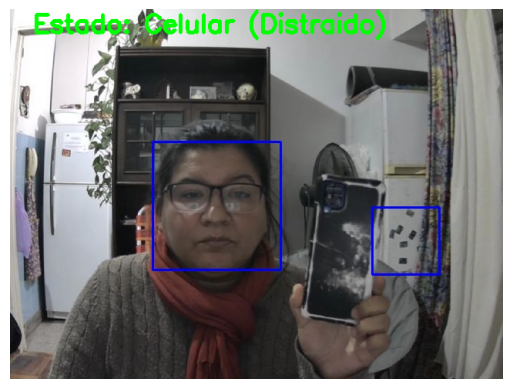

In [11]:
### IMPORTANTE ###
'''
INTENTAR EJECUTAR 2 VECES! LA PRIMERA RECHAZA Y PIDE PERMISO
LA SEGUNDA, CON EL PERMISO ACTIVADO, FUNCIONA

'''


try:
    filename = take_photo('photo.jpg')
    print('Saved to {}'.format(filename))
    img = cv2.imread('photo.jpg')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Detección de celular con función auxiliar ---
    celular_detectado, bbox_cel, img_rgb = detectar_celular_yolo(img_rgb, modelo_yolo)

    # --- Detección de rostro y estado ---
    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(refine_landmarks=True, static_image_mode=True) as face_mesh:
        results = face_mesh.process(img_rgb)
        estado = "Sin rostro"
        if results.multi_face_landmarks:
            for landmarks_obj in results.multi_face_landmarks:
                landmarks = landmarks_obj.landmark
                estado = detectar_estado(landmarks, celular_detectado)
        elif celular_detectado:
            estado = "Celular (Distraido)"

    # Escribimos el estado en la imagen
    cv2.putText(img, f'Estado: {estado}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 255, 0), 3)

    # Mostramos la imagen
    from matplotlib import pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
except Exception as err:
    print(str(err))



#Captura de video en tiempo real

Finalmente, el código permite procesar video en vivo desde la cámara. Cada fotograma (frame) se analiza para detectar distracciones y dar retroalimentación instantánea. Se dibujan las detecciones sobre la imagen que ve el usuario en tiempo real.

##Codigo para webcam en colab tiempo real

¿Qué hace este bloque?
Permite mostrar en el notebook un stream de video en vivo desde la cámara del usuario,
visualizar el estado detectado (ej: "Atento", "Distraído") y superponer imágenes generadas en Python (como los bounding boxes).

¿Por qué se usa JavaScript?
Porque Colab (y los navegadores en general) no permiten acceder directamente a la cámara desde Python.
Se usa JS para capturar el video y coordinar la comunicación con Python a través de funciones auxiliares.

¿Cómo se integra con Python?
Python llama a la función video_frame(label, bbox), que a su vez le pide a JS que actualice el estado y capture el frame actual.
El resultado se procesa en Python.

In [12]:
# Función para crear y manejar el streaming de video en vivo desde la webcam usando JavaScript
def video_stream():
  # Inyectamos código JavaScript al notebook para crear y controlar la cámara web
  js = Javascript('''
    // Declaración de variables globales para los distintos elementos y estados del stream
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null; // Para sincronizar capturas con Python
    var shutdown = false;      // Indica si hay que parar el stream

    // Elimina todos los elementos del DOM y detiene el stream de la cámara
    function removeDom() {
       stream.getVideoTracks()[0].stop();  // Detiene la cámara
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    // Función que se ejecuta constantemente para capturar frames de la cámara
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame); // Solicita el próximo frame
      }
      if (pendingResolve) {  // Si Python está esperando un frame
        var result = "";
        if (!shutdown) {
          // Dibuja el video actual en el canvas de captura
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8);  // Convierte el frame a base64
        }
        var lp = pendingResolve; // Resuelve la promesa para enviar el frame a Python
        pendingResolve = null;
        lp(result);
      }
    }

    // Crea todos los elementos visuales en la página para mostrar el video y los resultados
    async function createDom() {
      if (div !== null) {
        return stream;  // Si ya existe, no hace nada
      }

      // Crea el contenedor principal y lo agrega al DOM
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      // Crea un área para mostrar el estado del modelo (ej: "Atento", "Distraído")
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      // Crea el elemento de video para mostrar la webcam
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', ''); // Para que funcione bien en móvil
      video.onclick = () => { shutdown = true; }; // Si el usuario hace clic, para el stream
      // Solicita acceso a la cámara (modo environment para usar la cámara trasera si existe)
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      // Imagen para superponer resultados (ej: bounding boxes)
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      // Instrucción para el usuario de cómo cerrar el stream
      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      // Conecta el stream de la cámara al elemento video y lo reproduce
      video.srcObject = stream;
      await video.play();

      // Crea el canvas para capturar los frames
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480;
      // Empieza a pedir frames continuamente
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }

    // Esta función es llamada desde Python para actualizar la visualización y obtener un nuevo frame
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();  // Si el usuario cerró la demo, limpia todo
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();  // Asegura que todo esté creado

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;  // Muestra el estado actual en pantalla
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;  // Superpone una imagen (ej: con bounding boxes)
      }

      var preCapture = Date.now();
      // Espera a que se capture el siguiente frame y lo devuelve a Python
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)  # Muestra y ejecuta el código JavaScript en el notebook

# Función auxiliar de Python que solicita un frame y los datos de visualización al JS
def video_frame(label, bbox):
  # Llama a la función stream_frame de JS con los parámetros de estado (label) e imagen a superponer (bbox)
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data  # Devuelve un diccionario con los tiempos y la imagen capturada (base64)


##Programa

###Inicialización
================
-Se importan las librerías necesarias y se inicializan los módulos de MediaPipe y la webcam.
-Se crean variables auxiliares para llevar control del estado anterior y del tiempo de atención.

###Lectura de cada frame
=====================
-Se lee la imagen actual de la webcam y se convierte al formato que espera MediaPipe (RGB).
-Se procesa la imagen para obtener los puntos clave del rostro.

###Clasificación del estado
=========================
-Si MediaPipe detecta landmarks, se decide si la persona está de perfil, mirando hacia abajo (distraída) o atenta.
-Si no se detecta rostro, se indica como "Sin rostro".

###Cálculo de duración de atención
================================
-Si se pasa de estar atento a distraído, se calcula cuánto tiempo estuvo atenta la persona justo antes de distraerse.
Esto se usa, por ejemplo, para analizar patrones de atención en el futuro.

###Alerta sonora
=============
-Si la persona está distraída (cualquier tipo), se llama a la función que emite un pitido y un mensaje de voz.
Esto ocurre solo si pasó más de 5 segundos desde la última alerta (para no molestar).

###Visualización
=============
-El estado actual se escribe sobre la imagen y se muestra en una ventana.
El ciclo se repite hasta que se presiona la tecla 'q'.

In [21]:
# Variables para el análisis
ultimo_estado = None
tiempo_inicio_atento = None
sesion_id = 1
timestamp_inicio_sesion = time.time()
video_stream()  # Asegurate de ejecutar antes el bloque JS de video
label_html = 'Capturando...'
bbox = ''
eventos = []
frame_idx = 0
last_alert = 0

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    celular_detectado, bbox_cel, img_rgb = detectar_celular_yolo(img_rgb, modelo_yolo)

    mp_face_mesh = mp.solutions.face_mesh
    with mp_face_mesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(img_rgb)
        estado = "Sin rostro"
        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark
            estado = detectar_estado(landmarks, celular_detectado)
        elif celular_detectado:
            estado = "Celular (Distraido)"

    # --- Cálculo de duración de atención antes de la distracción ---
    duracion_atencion_antes = None
    now = time.time()
    if estado == "Atento":
        if ultimo_estado != "Atento":
            tiempo_inicio_atento = now
    elif "Distraido" in estado:
        if ultimo_estado == "Atento" and tiempo_inicio_atento is not None:
            duracion_atencion_antes = now - tiempo_inicio_atento

    # --- Pitido y voz si está distraído
    if "Distraido" in estado:
        if now - last_alert > 5:
            beep_and_speak()
            last_alert = now

    # --- Guardar evento SOLO si hay distracción
    if "Distraido" in estado and ultimo_estado == "Atento":
        eventos.append({
            "sesion_id": sesion_id,
            "frame": frame_idx,
            "timestamp": now,
            "tiempo_relativo": now - timestamp_inicio_sesion,
            "estado": estado,
            "celular": celular_detectado,
            "hora_local": time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(now)),
            "tiempo_atencion_antes": duracion_atencion_antes
        })

    frame_idx += 1
    ultimo_estado = estado

    # --- Visualización (ejemplo simple, podés customizar más) ---
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # Elegí ancho, alto y posición del label
    x, y, w, h = 10, 20, 380, 55
    overlay_color = (0,0,0,180)  # negro semitransparente (RGBA)
    cv2.rectangle(bbox_array, (x, y), (x+w, y+h), overlay_color, -1)

    # Texto centrado dentro del label
    cv2.putText(bbox_array, f'Estado: {estado}', (x+15, y+40), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0,255,0,255), 4, cv2.LINE_AA)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes


# Guardar resultados al final
import pandas as pd
df_eventos = pd.DataFrame(eventos)
df_eventos.to_csv("estados_estudio.csv", index=False)
print("Archivo estados_estudio.csv guardado en tu entorno.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

#Celda de calibracion nariz (cabeza gacha)

<IPython.core.display.Javascript object>

Colocá tu cara mirando al frente, después agachate. Observá los valores Y en cada caso.
Tocá en el video para terminar.
Calibración terminada.


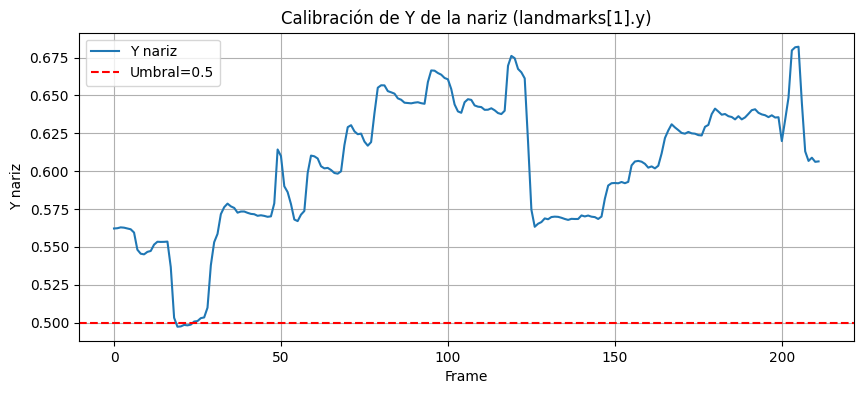

In [15]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# ---------- Funciones auxiliares ----------
def medir_y_nariz(landmarks):
    return landmarks[1].y

def is_head_down(landmarks, y_th=0.5):
    return landmarks[1].y > y_th

# ---------- Inicialización ----------
import mediapipe as mp
mp_face_mesh = mp.solutions.face_mesh

# Si usás Colab: asegurate de correr antes el bloque de video_stream y video_frame
video_stream()  # SOLO si usás el sistema JS + Python para la webcam
label_html = 'Calibrando...'
bbox = ''

# ---------- Variables de calibración ----------
valores_y_nariz = []
frame_idx = 0
Y_UMBRAL = 0.5    # Cambiá este valor para probar

# ---------- Calibración ----------
print("Colocá tu cara mirando al frente, después agachate. Observá los valores Y en cada caso.")
print("Tocá en el video para terminar.")

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with mp_face_mesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(img_rgb)
        y_nariz = None
        estado = "Sin rostro"
        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark
            y_nariz = medir_y_nariz(landmarks)
            valores_y_nariz.append(y_nariz)
            if is_head_down(landmarks, Y_UMBRAL):
                estado = f"Agachado (y={y_nariz:.3f})"
            else:
                estado = f"Atento (y={y_nariz:.3f})"
        else:
            valores_y_nariz.append(np.nan)

    # --- Mostrar estado y valor en pantalla ---
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
    cv2.putText(bbox_array, f'Estado: {estado}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0,255), 3)
    if y_nariz is not None:
        cv2.putText(bbox_array, f'Y nariz: {y_nariz:.3f}', (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0,255), 3)
        # Línea horizontal para visualizar el umbral
        y_px = int(y_nariz * 480)
        y_umbral_px = int(Y_UMBRAL * 480)
        cv2.line(bbox_array, (0, y_umbral_px), (640, y_umbral_px), (0, 0, 255, 255), 2)
        cv2.putText(bbox_array, f'Umbral Y={Y_UMBRAL:.2f}', (400, y_umbral_px - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255,255), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes
    frame_idx += 1

print("Calibración terminada.")

# ---------- Graficar los valores obtenidos ----------
plt.figure(figsize=(10,4))
plt.plot(valores_y_nariz, label="Y nariz")
plt.axhline(Y_UMBRAL, color='red', linestyle='--', label=f'Umbral={Y_UMBRAL}')
plt.title("Calibración de Y de la nariz (landmarks[1].y)")
plt.xlabel("Frame")
plt.ylabel("Y nariz")
plt.legend()
plt.grid()
plt.show()


#Celda de calibracion ojos (perfil)

In [20]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import mediapipe as mp

# ---------- Función auxiliar ----------
def medir_diff_ojos(landmarks):
    """Devuelve la diferencia absoluta en X entre los landmarks de los ojos (33 y 263)."""
    return abs(landmarks[33].x - landmarks[263].x)

def is_profile(landmarks, x_th=0.09):
    """Devuelve True si la persona está de perfil (diferencia entre ojos baja)."""
    return abs(landmarks[33].x - landmarks[263].x) < x_th

# ---------- Inicialización ----------
mp_face_mesh = mp.solutions.face_mesh

video_stream()
label_html = 'Calibrando perfil...'
bbox = ''

valores_diff_ojos = []
frame_idx = 0
X_UMBRAL = 0.09    # Cambiá este valor para probar

print("Mirá de frente y después girá la cabeza de perfil. Observá los valores en pantalla y el gráfico.")
print("Tocá en el video para terminar.")

while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    img = js_to_image(js_reply["img"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    with mp_face_mesh.FaceMesh(refine_landmarks=True) as face_mesh:
        results = face_mesh.process(img_rgb)
        diff_ojos = None
        estado = "Sin rostro"
        if results.multi_face_landmarks:
            landmarks = results.multi_face_landmarks[0].landmark
            diff_ojos = medir_diff_ojos(landmarks)
            valores_diff_ojos.append(diff_ojos)
            if is_profile(landmarks, X_UMBRAL):
                estado = f"Perfil (diff={diff_ojos:.3f})"
            else:
                estado = f"Frente (diff={diff_ojos:.3f})"
        else:
            valores_diff_ojos.append(np.nan)

    # --- Mostrar estado y valor en pantalla ---
    bbox_array = np.zeros([480, 640, 4], dtype=np.uint8)
    cv2.putText(bbox_array, f'Estado: {estado}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0,255), 3)
    if diff_ojos is not None:
        cv2.putText(bbox_array, f'Diff ojos: {diff_ojos:.3f}', (20, 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0,255), 3)
        # Línea vertical para visualizar el umbral (en el gráfico, no en la imagen)
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    bbox_bytes = bbox_to_bytes(bbox_array)
    bbox = bbox_bytes
    frame_idx += 1

print("Calibración terminada.")

# ---------- Graficar los valores obtenidos ----------
plt.figure(figsize=(10,4))
plt.plot(valores_diff_ojos, label="Diff ojos (|x33-x263|)")
plt.axhline(X_UMBRAL, color='red', linestyle='--', label=f'Umbral={X_UMBRAL}')
plt.title("Calibración de perfil (diferencia entre ojos)")
plt.xlabel("Frame")
plt.ylabel("Diff ojos (|x33-x263|)")
plt.legend()
plt.grid()
plt.show()


<IPython.core.display.Javascript object>

Mirá de frente y después girá la cabeza de perfil. Observá los valores en pantalla y el gráfico.
Tocá en el video para terminar.


KeyboardInterrupt: 